<a href="https://colab.research.google.com/github/colawhite/udemy/blob/master/abtesting/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://arxiv.org/pdf/1707.02038.pdf
from scipy.stats import beta
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from operator import add 

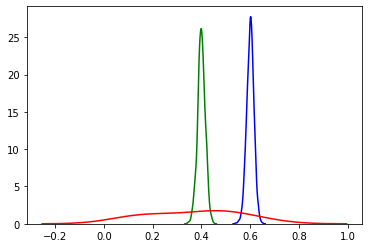

In [2]:
action1 = beta.rvs(a=600, b=400, size=1000)
action2 = beta.rvs(a=400, b=600, size=1000)
action3 = beta.rvs(a=4, b=6, size=10)
sns.distplot(action1,hist=False,color='blue')
sns.distplot(action2,hist=False,color='green')
sns.distplot(action3,hist=False,color='red')

In [0]:
simloops = 1000
periods = 1000
probs= [0.7,0.8,0.9]
pct = {}
pct[0] = [0]*periods
pct[1] = [0]*periods
pct[2] = [0]*periods

In [4]:
for sim in range(simloops):
    a = [1,1,1]
    b = [1,1,1]
    for t in range(periods):
        posterior_prob = np.random.beta(a,b)
        action = np.random.choice(np.where(posterior_prob == posterior_prob.max())[0])
        reward = np.random.binomial(1, probs[action])
        pct[action][t] += 1
        a[action] += reward
        b[action] += 1-reward
    if sim%100 == 1:
        print ("{} out of {} simulations have been completed".format(sim,simloops))

1 out of 1000 simulations have been completed
101 out of 1000 simulations have been completed
201 out of 1000 simulations have been completed
301 out of 1000 simulations have been completed
401 out of 1000 simulations have been completed
501 out of 1000 simulations have been completed
601 out of 1000 simulations have been completed
701 out of 1000 simulations have been completed
801 out of 1000 simulations have been completed
901 out of 1000 simulations have been completed


In [5]:
for i in range(3):
    print (i,pct[i][:5])

0 [324, 287, 284, 312, 292]
1 [345, 330, 340, 325, 322]
2 [331, 383, 376, 363, 386]


In [0]:
for i in range(3):
    pct[i] = [x/simloops for x in pct[i]]

In [7]:
for i in range(3):
    print (i,pct[i][:5])

0 [0.324, 0.287, 0.284, 0.312, 0.292]
1 [0.345, 0.33, 0.34, 0.325, 0.322]
2 [0.331, 0.383, 0.376, 0.363, 0.386]


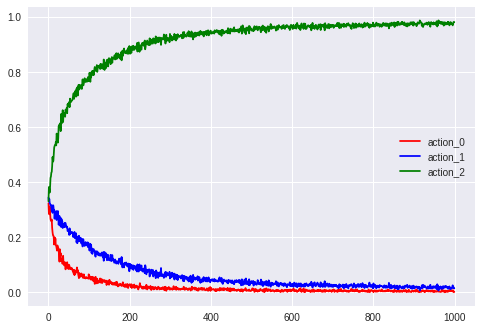

In [8]:
t = [x for x in range(periods)]
mpl.style.use('seaborn')
plt.plot(t,pct[0],color='red',label='action_0')
plt.plot(t,pct[1],color='blue',label='action_1')
plt.plot(t,pct[2],color='green',label='action_2')
plt.legend()

In [9]:
for i in range(3):
    print (i,pct[i][-5:])

0 [0.004, 0.008, 0.002, 0.001, 0.003]
1 [0.026, 0.016, 0.016, 0.018, 0.015]
2 [0.97, 0.976, 0.982, 0.981, 0.982]
